----------------

# Отчет по лабораторной работе: "Домен применимости"

---------

## Дата выполнения лабораторной работы

`04.01.2025`

---

## Название лабораторной работы 

`"Домен применимости"`

---

## Цель лабораторной работы

`Изучить методы, используемые для определения областей применимости моделей "структура-свойства"`

----------------------

## Задачи лабораторной работы


1. Ознакомление с концепцией домена применимости (Applicability Domain, AD)

2. Исследование методов: Bounding, Reaction Type Control, Leverage.

4. Выявить объекты тестовой выборки, выходящие за границы домена применимости.
5. Оценить, как исключение таких объектов влияет на качество предсказаний модели.
6. Сравнить результаты использования разных методов

----

## Материалы, использовавшиеся для выполнения лабораторной работы (программы, исходные файлы ?) 

1. [Официальная документация RDKit](https://www.rdkit.org/docs/source/rdkit.Chem.html)
2. [Официальная документация scikit-learn](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

----

## Поэтапное изложение процедуры


1. Оценка домена применимости с помощью метода Leverage

Рассчитано leverage-значение для объектов в тестовой выборке.
Определены пороговые значения. Разделены объекты на внутри и вне домена применимости. Проведена оценка качества модели на этих группах.

2. Исследование метода Bounding Box

Определены минимальные и максимальные значения каждого признака в обучающем наборе данных. Определены объекты, выходящие за границы этого диапазона. Оценено качество модели отдельно для объектов внутри и за пределами домена.


3. Анализ метода Reaction Type Control

Выделены объекты, принадлежащие к известным типам реакций, и объекты с новыми, ранее не встречавшимися типами.
Проведена оценка качества модели для этих групп.


-----

## Результаты работы (+ таблицы, графики, иллюстрации?, если требуются)



Leverage.png


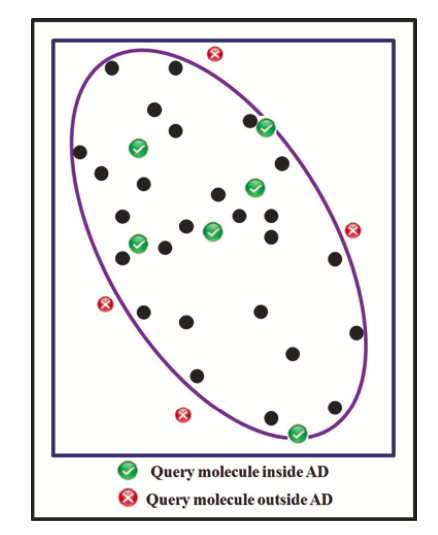

Bounding_Box.png


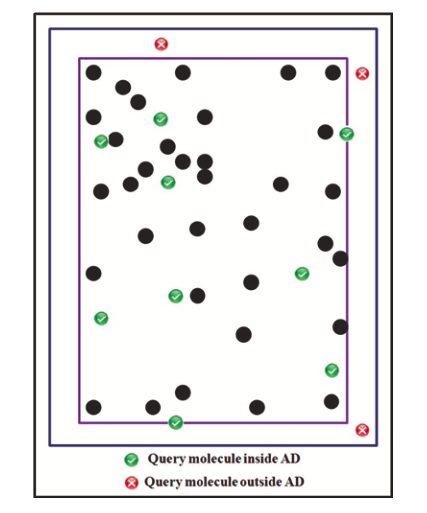

In [3]:
from IPython.display import display
from PIL import Image
import os

png_files = [f for f in os.listdir("./images") if f.endswith(".png")]

for file in png_files:
    print(file)
    img = Image.open(f"images/{file}")
    display(img)

----

## Выводы 


Домен применимости значительно влияет на качество предсказаний модели.
RMSE и 𝑅2 показывают, что модель работает хорошо внутри домена (низкие ошибки, высокая объясняющая способность).
Вне домена качество существенно ухудшается, особенно заметен рост RMSE.

Leverage и Reaction Type Control дают более широкий домен применимости по сравнению с Bounding Box, так как их coverage выше. Однако Bounding Box дает наиболее жесткие границы.

Метод Reaction Type Control показывает наилучшее качество внутри домена (𝑅2=0.94, RMSE = 0.46), что говорит о его перспективности для структурного анализа данных.

Применение этих методов в разработке лекарств позволяет снизить количество ложноположительных и ложноотрицательных предсказаний. Это особенно важно на ранних стадиях поиска перспективных соединений.